In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import numpy as np

# Objective:

* Try and implement basic DL models using fastai v1 (code from 2019 course v3 DL1), Keras (what I know), Pytorch (learning)

## Project: Digit identifier

* Use MNIST = (28x28) handwritten grayscale digits, class 0 -> '3', class 1 -> '7'. Our model will need to learn to differentiate between these distinct categories.

### Fastai

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
!pip freeze | grep fastai

fastai==1.0.51


You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
# main path where data is (fastai -> used `path = untar_data(URLs.MNIST_SAMPLE)` to download/extract data)
path = Path(r"C:\Users\Shonket Ray\.fastai\data\mnist_sample")
path

WindowsPath('C:/Users/Shonket Ray/.fastai/data/mnist_sample')

In [6]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

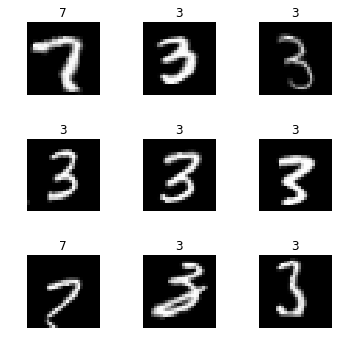

In [7]:
data.show_batch(rows=3, figsize=(5,5))

In [8]:
# Fit model on learner with lr learning rate, wd weight decay for epochs=2 with callbacks
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.161717,0.086099,0.964671,00:50
1,0.101754,0.051390,0.982826,00:41


In [9]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [10]:
# Create from csv
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

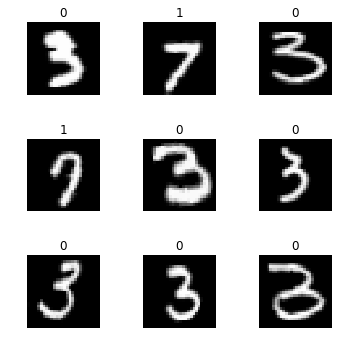

In [11]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [12]:
# Create from pandas df
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

In [13]:
# show some paths
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[WindowsPath('C:/Users/Shonket Ray/.fastai/data/mnist_sample/train/3/7463.png'),
 WindowsPath('C:/Users/Shonket Ray/.fastai/data/mnist_sample/train/3/21102.png')]

In [14]:
# Create from using regex
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

In [15]:
# Create from function (Windows is messing func up)
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['7']

In [16]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['7', '7', '7', '7', '7']

In [17]:
# Create from list of fnames in path (Windows is messing func up)
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['7']